In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler

In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [3]:
x_train,x_valid=x_train[:50000],x_train[50000:]
y_train,y_valid=y_train[:50000],y_train[50000:]

In [4]:
scaler=StandardScaler()

In [5]:
x_train=scaler.fit_transform(x_train.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_valid=scaler.transform(x_valid.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)
x_test=scaler.transform(x_test.astype(np.float32).reshape(-1,1)).reshape(-1,28,28)

In [6]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))
for _ in range(30):
    model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [7]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

In [8]:
history=model.fit(x_train,y_train,validation_data=[x_valid,y_valid],epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 145us/sample - loss: 2.2814 - accuracy: 0.1418 - val_loss: 2.1285 - val_accuracy: 0.1990
Epoch 2/30
50000/50000 [==============================] - 6s 123us/sample - loss: 1.6166 - accuracy: 0.2898 - val_loss: 1.0934 - val_accuracy: 0.5302
Epoch 3/30
50000/50000 [==============================] - 6s 121us/sample - loss: 1.0188 - accuracy: 0.5769 - val_loss: 0.9546 - val_accuracy: 0.5487
Epoch 4/30
50000/50000 [==============================] - 6s 123us/sample - loss: 0.8181 - accuracy: 0.6744 - val_loss: 0.7537 - val_accuracy: 0.7066
Epoch 5/30
50000/50000 [==============================] - 6s 122us/sample - loss: 0.7078 - accuracy: 0.7312 - val_loss: 0.7135 - val_accuracy: 0.7439
Epoch 6/30
50000/50000 [==============================] - 6s 121us/sample - loss: 1.0346 - accuracy: 0.6054 - val_loss: 0.9531 - val_accuracy: 0.6197
Epoch 7/30
50000/50000 [==========================

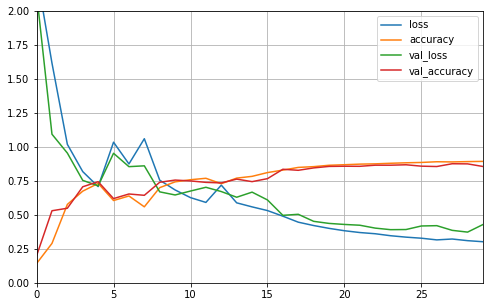

In [12]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=[8,5])
    plt.grid(True)
    plt.gca().set_ylim(0,2)
    plt.show()
    
plot_learning_curves(history)

In [13]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.44623256871700284, 0.8477]

In [14]:
# 1.    20层，不使用批归一化，不使用dropout，训练集0.9375 验证集0.8678 测试集0.8595 有过拟合现象
# 2.    30层，不使用批归一化，不使用dropout，训练集0.8934 验证集0.8559 测试集0.8477  有过拟合现象